In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail_df=pd.read_csv("OnlineRetail.csv",header=0,encoding='latin1')

In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail_df=retail_df.dropna()

In [9]:
retail_df["CustomerID"]=retail_df["CustomerID"].astype(str)

# RFM Analysis
R: Recency - Number of days since last purchase
F: Frequency- Number of Transaction
M: Monetory - Amount of Transaction

In [10]:
import datetime as dt

In [11]:
# Calculating the amount = units x price

In [12]:
retail_df["Amount"]=retail_df["Quantity"]*retail_df["UnitPrice"]

In [13]:
rfm_m=retail_df.groupby("CustomerID")["Amount"].sum()

In [14]:
rfm_m=rfm_m.reset_index()

In [15]:
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Frequency

In [16]:
rfm_f=retail_df.groupby("CustomerID")["InvoiceNo"].count()

In [17]:
rfm_f=rfm_f.reset_index()

In [18]:
rfm_f.columns=["CustomerID","Frequency"]

In [19]:
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [20]:
rfm=pd.merge(rfm_m,rfm_f,on="CustomerID",how="inner")

In [21]:
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
retail_df["InvoiceDate"]=pd.to_datetime(retail_df["InvoiceDate"],format="%d-%m-%Y %H:%M")

In [23]:
max_date=max(retail_df["InvoiceDate"])

In [24]:
retail_df["DaysSinceLastPurchase"]=max_date-retail_df["InvoiceDate"]

In [25]:
rfm_r=retail_df.groupby("CustomerID")["DaysSinceLastPurchase"].min()

In [26]:
rfm_r=rfm_r.reset_index()

In [27]:
rfm_r.head()

,CustomerID,DaysSinceLastPurchase
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [28]:
# Exact number of days

In [29]:
rfm_r["DaysSinceLastPurchase"]=rfm_r["DaysSinceLastPurchase"].dt.days
rfm_r.head()

,CustomerID,DaysSinceLastPurchase
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [30]:
rfm=pd.merge(rfm,rfm_r,on="CustomerID",how="inner")

In [31]:
rfm.head()

,CustomerID,Amount,Frequency,DaysSinceLastPurchase
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Building the elbow graph

<AxesSubplot:>

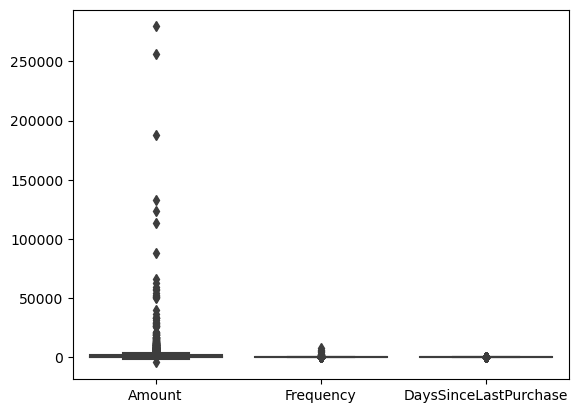

In [32]:
sns.boxplot(data=rfm)

In [33]:
# Removing the outliers of the data

In [34]:
Q1=np.percentile(rfm["Amount"],25)
Q3=np.percentile(rfm["Amount"],75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
outer=Q3+1.5*IQR
rfm=rfm[(rfm["Amount"]>=lower)&(rfm["Amount"]<=outer)]
    


In [35]:
Q1=np.percentile(rfm["Frequency"],25)
Q3=np.percentile(rfm["Frequency"],75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
outer=Q3+1.5*IQR
rfm=rfm[(rfm["Frequency"]>=lower)&(rfm["Frequency"]<=outer)]
    
    
    

In [36]:
Q1=np.percentile(rfm["DaysSinceLastPurchase"],25)
Q3=np.percentile(rfm["DaysSinceLastPurchase"],75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
outer=Q3+1.5*IQR
rfm=rfm[(rfm["DaysSinceLastPurchase"]>=lower)&(rfm["DaysSinceLastPurchase"]<=outer)]
    

In [37]:
rfm.head()

,CustomerID,Amount,Frequency,DaysSinceLastPurchase
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
rfm_df=rfm[["Amount","Frequency","DaysSinceLastPurchase"]]

In [41]:
rfm_df_scaled=sc.fit_transform(rfm_df)

In [42]:
rfm__df_scaled=pd.DataFrame(rfm_df_scaled,columns=["Amount","Frequency","DaysSinceLastPurchase"])

In [43]:
rfm__df_scaled.head()

,Amount,Frequency,DaysSinceLastPurchase
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


In [44]:
rfm__df_scaled.shape

(3697, 3)

In [45]:
from sklearn.cluster import KMeans

In [46]:
cl=[]
for c in range(1,10):
    kmm=KMeans(n_clusters=c).fit(rfm__df_scaled)
    cl.append(kmm.inertia_)

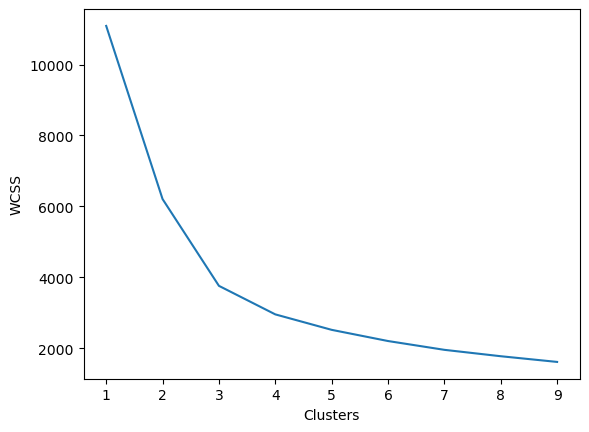

In [47]:
plt.plot(list(range(1,10)),cl)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [48]:
# Taking n_clusters =3

In [49]:
kmm=KMeans(n_clusters=3)
kmm.fit(rfm__df_scaled)

KMeans(n_clusters=3)

In [50]:
rfm["Labels"]=kmm.labels_

In [51]:
rfm.head()

,CustomerID,Amount,Frequency,DaysSinceLastPurchase,Labels
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,1


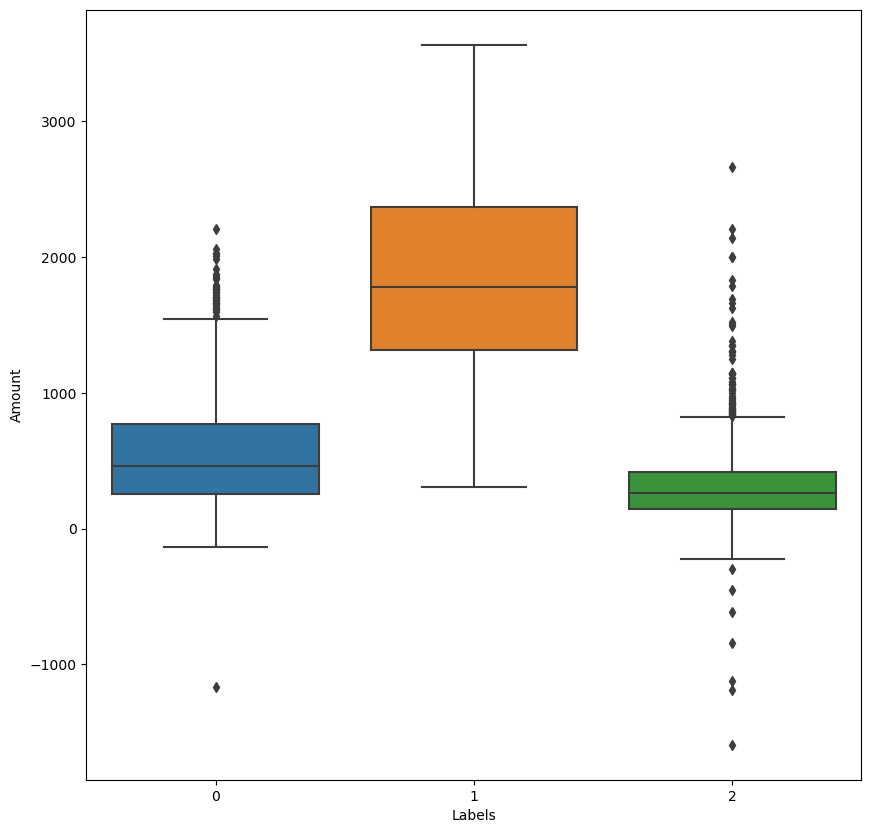

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(y="Amount",x="Labels", data=rfm)
plt.show()

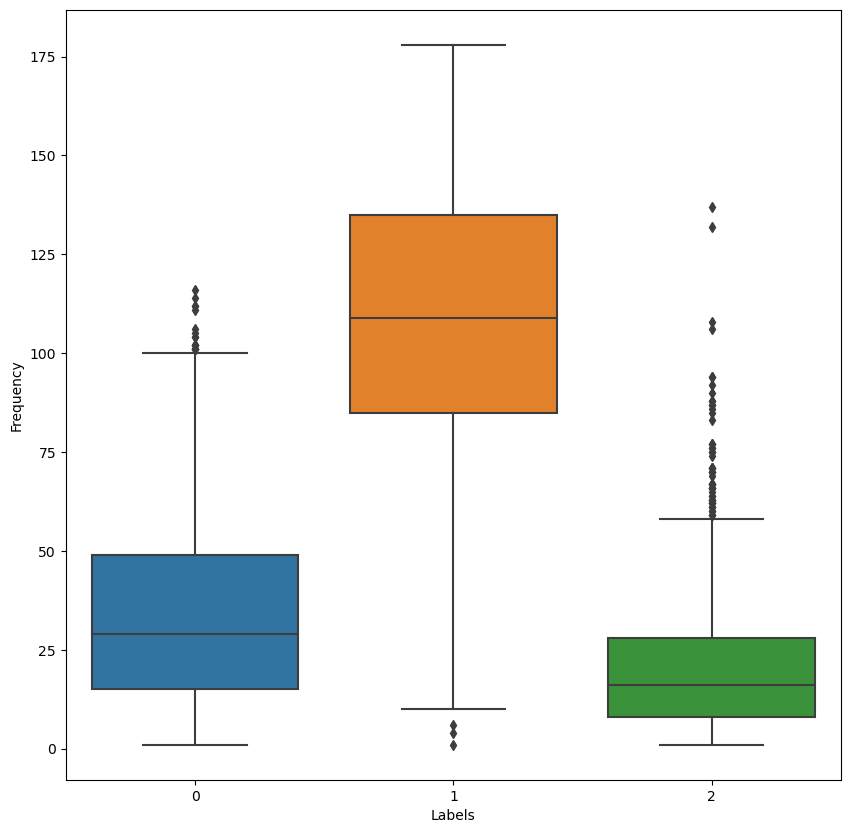

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(y="Frequency", x="Labels",data=rfm)
plt.show()

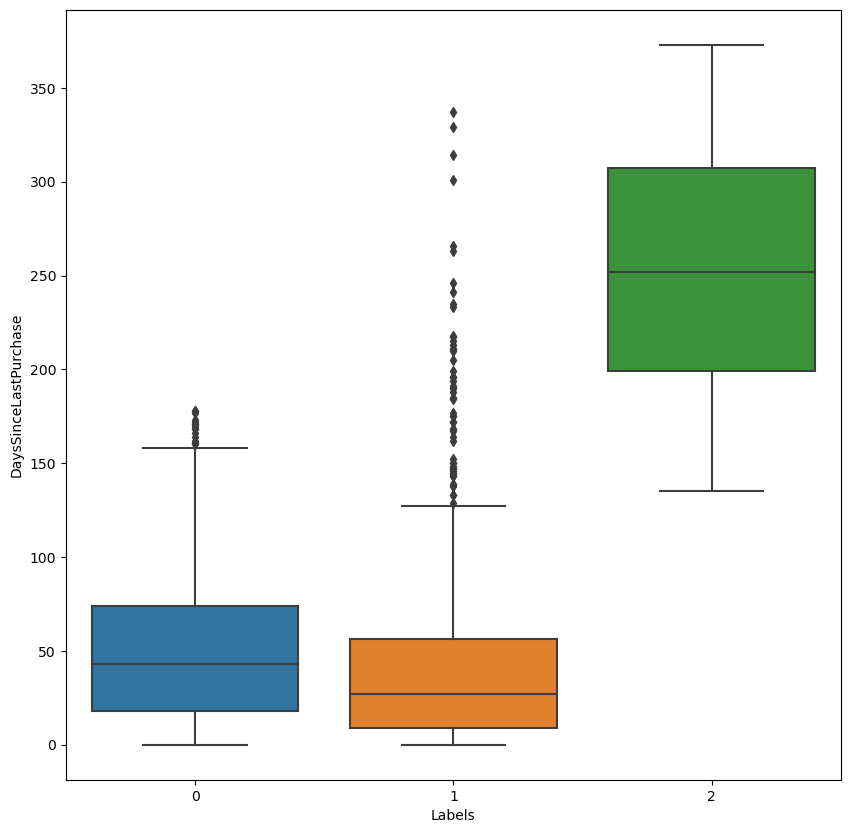

In [54]:
plt.figure(figsize=(10,10))
sns.boxplot(y="DaysSinceLastPurchase",x="Labels", data=rfm)
plt.show()

<Figure size 1000x1000 with 0 Axes>

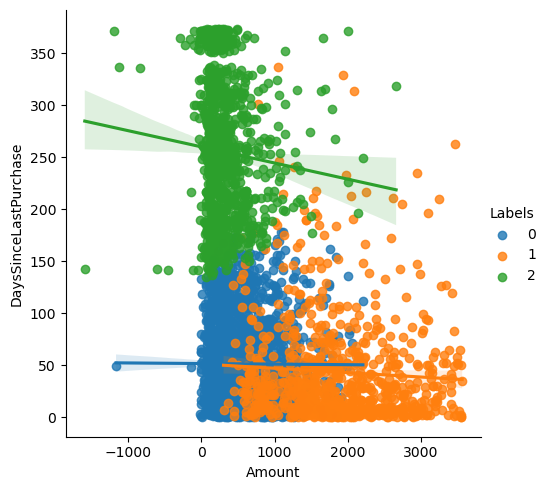

In [55]:
plt.figure(figsize=(10,10))
sns.lmplot(y="DaysSinceLastPurchase",x="Amount", data=rfm,hue="Labels")
plt.show()

<Figure size 1000x1000 with 0 Axes>

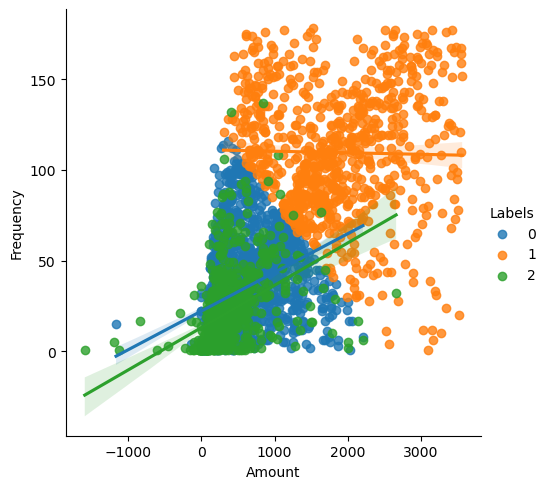

In [56]:
plt.figure(figsize=(10,10))
sns.lmplot(y="Frequency",x="Amount", data=rfm,hue="Labels")
plt.show()

<Figure size 1000x1000 with 0 Axes>

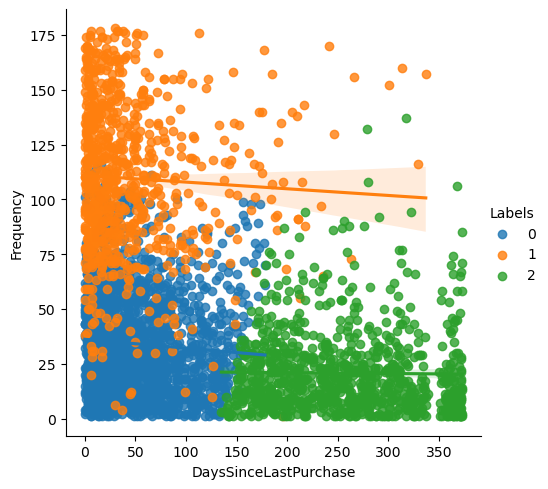

In [57]:
plt.figure(figsize=(10,10))
sns.lmplot(y="Frequency",x="DaysSinceLastPurchase", data=rfm,hue="Labels")
plt.show()

<Figure size 1000x1000 with 0 Axes>

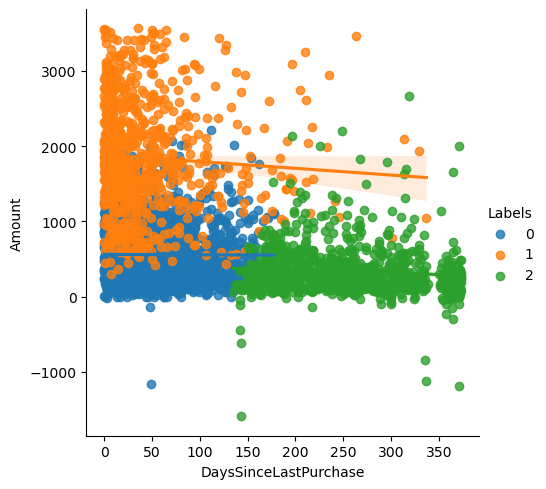

In [58]:
plt.figure(figsize=(10,10))
sns.lmplot(y="Amount",x="DaysSinceLastPurchase", data=rfm,hue="Labels")
plt.show()